## Trabalho de M109

|Nome|Matrícula|Curso|
|---------|---------|---------|
|Danilo Ribeiro|1411|Eng. Computação|
|Luana Gribel Ito|1354|Eng. Computação|
---

In [86]:
import pprint as pp
import pandas as pd
from pathlib import Path
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
from sklearn import preprocessing

In [87]:
path = Path("doc", "table75.csv")
table = pd.read_csv(path, header=None)
samples = table[0].values

bins = 9 # 9

In [88]:
m = np.mean(samples)
s = np.std(samples, ddof=1)
n = len(samples)

In [89]:
x = (samples - m) / s
print(x)

[ 1.02691064  0.         -1.02691064 -0.51345532 -2.05382127 -0.51345532
  1.54036595  0.         -1.54036595 -0.51345532  1.54036595  0.
  1.02691064 -1.54036595  0.51345532  0.51345532 -0.51345532  2.05382127
 -1.02691064  0.51345532  0.51345532  1.02691064 -1.02691064  0.
  0.          1.02691064  0.51345532  0.         -0.51345532 -1.02691064]


In [90]:
statistic, pvalue = stats.kstest(
    x,
    stats.norm.cdf,
    N=n
)

print(50 * "-")
print("Estatísticas")
print(50 * "-")
print("Média: {:.3f}".format(m))
print("Desvio Padrão: {:.3f}".format(s))
print("N: {}".format(n))
print("KS: {:.3f}".format(statistic))
print("P-Value: {:.3f}".format(pvalue))

--------------------------------------------------
Estatísticas
--------------------------------------------------
Média: 14.000
Desvio Padrão: 1.948
N: 30
KS: 0.100
P-Value: 0.925


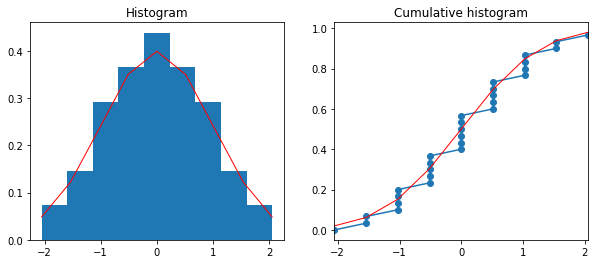

In [97]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
p = stats.norm.pdf(x, loc=0, scale=1)

ax1.hist(x, bins=bins, density=True)
ax1.plot(x, p, 'r', linewidth=1)
ax1.set_title('Histogram')

ax2 = fig.add_subplot(1, 2, 2)

x = np.sort(x)
y = np.arange(n) / float(n)

d = stats.norm.cdf(x, loc=0, scale=1)

ax2.plot(x, y, marker='o')
ax2.plot(x, d, 'r', linewidth=1)
ax2.set_title('Cumulative histogram')
ax2.set_xlim([x.min(), x.max()])
#ax2.set_yscale('log')

plt.show()